### Importing the dependencies libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### Data collection & processing

In [4]:
#load the deta set
data=pd.read_csv("breast-cancer.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [5]:
#print the first 5 rows of the dataset
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
# Check the distribution of the diagnosis column
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [8]:
# Encode the diagnosis labels (B = 0, M = 1)
data['diagnosis']=label_encoder.fit_transform(data['diagnosis'])

In [9]:
# Create a new column 'label' for encoded diagnosis
data['label'] = data.diagnosis

In [10]:
# Check the distribution of the new label column
data['label'].value_counts()

0    357
1    212
Name: label, dtype: int64

In [11]:
# Check the shape of the dataset
data.shape

(569, 33)

In [12]:
# Get some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
# Check for missing values in the dataset
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
label                      0
dtype: int64

In [14]:
# Drop unnecessary columns
data = data.drop(columns=['id','diagnosis'])  # Drop a single column


In [15]:
# Statistical measures about the data
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  texture_worst  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst       label  
count               569.000000  569.000000  
mean                  0.083946    0.372583  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    0.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [16]:
# Group data by label and get the mean of each feature
data.groupby('label').mean()

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
label                                                                           
0        12.146524     17.914762       78.075406  462.790196         0.092478   
1        17.462830     21.604906      115.365377  978.376415         0.102898   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
label                                                                         
0              0.080085        0.046058             0.025717       0.174186   
1              0.145188        0.160775             0.087990       0.192909   

       fractal_dimension_mean  ...  radius_worst  texture_worst  \
label                          ...                                
0                    0.062867  ...     13.379801      23.515070   
1                    0.062680  ...     21.134811      29.318208   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
label                                                                      
0            87.005938   558.899440          0.124959           0.182673   
1           141.370330  1422.286321          0.144845           0.374824   

       concavity_worst  concave points_worst  symmetry_worst  \
label                                                          
0             0.166238              0.074444        0.270246   
1             0.450606              0.182237        0.323468   

       fractal_dimension_worst  
label                           
0                     0.079442  
1                     0.091530  

[2 rows x 30 columns]

#### seprating the feature and target


In [17]:
# Separating the features and target variable
x = data.drop(columns='label',axis = 1)#Features
y=data['label']# Target variable

In [18]:
# Check the feature and target variable shapes
x,y

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      compactness_mean  concavity_mean  concave po

#### spliting the data into traning data & Testing data

In [19]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
# Check the shapes of the split data
x.shape,x_test.shape,x_train.shape

((569, 30), (114, 30), (455, 30))

### visualization

In [21]:
#check the median of data
data.median()

radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_worst            0.211900
concavity_wo

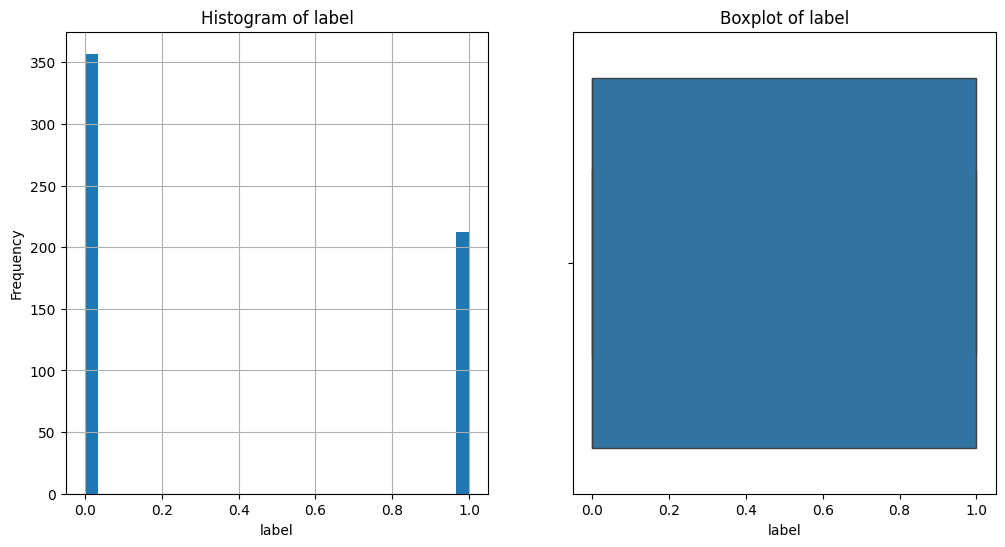

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['label'].hist(bins=30)
plt.title('Histogram of label')
plt.xlabel('label')
plt.ylabel('Frequency')


# Boxplot of 'LB'
plt.subplot(1, 2, 2)
sns.boxplot(x=data['label'])
plt.title('Boxplot of label')
plt.show()

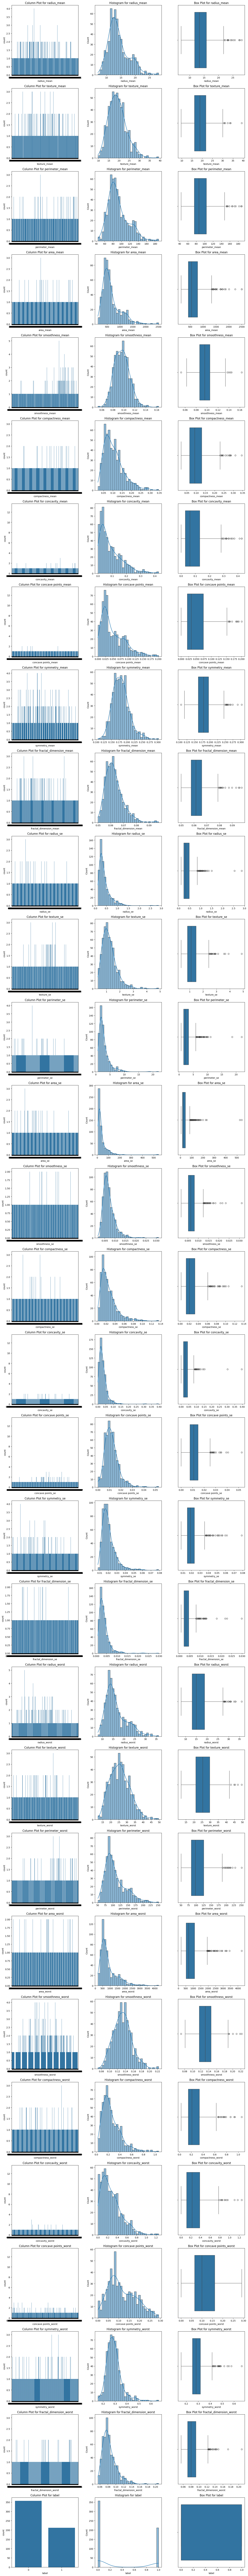

In [23]:
# Set the number of rows and columns for subplots
num_cols = len(data.columns)
fig, axes = plt.subplots(num_cols, 3, figsize=(15, 5 * num_cols))

for i, column in enumerate(data.columns):
    # Column Plot
    sns.countplot(x=column, data=data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Column Plot for {column}')

    # Histogram
    sns.histplot(data[column], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram for {column}')
# Box Plot
    sns.boxplot(x=data[column], ax=axes[i, 2])
    axes[i, 2].set_title(f'Box Plot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
correlation=data.corr(numeric_only=True)
correlation

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   
label                       0.730029      0.415185        0.742636   0.708984   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se           

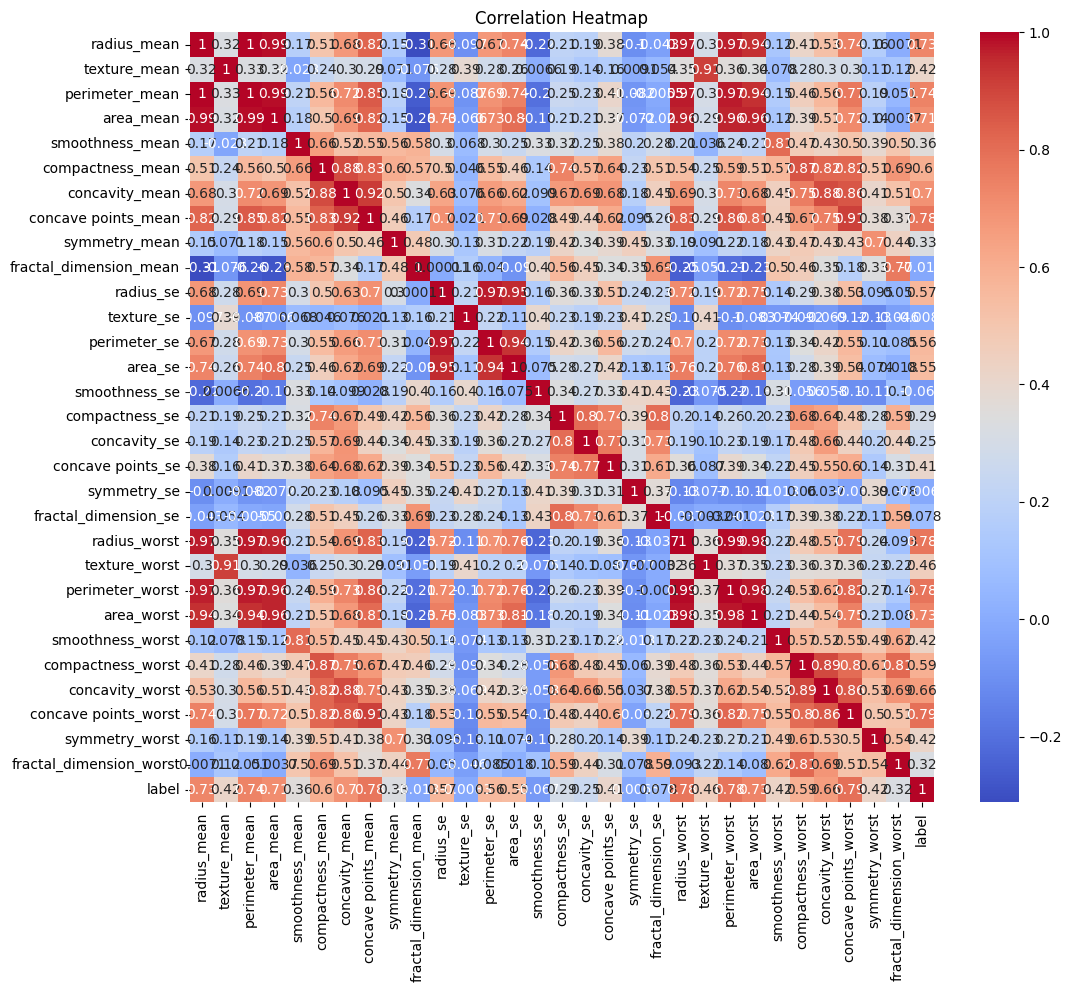

In [25]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


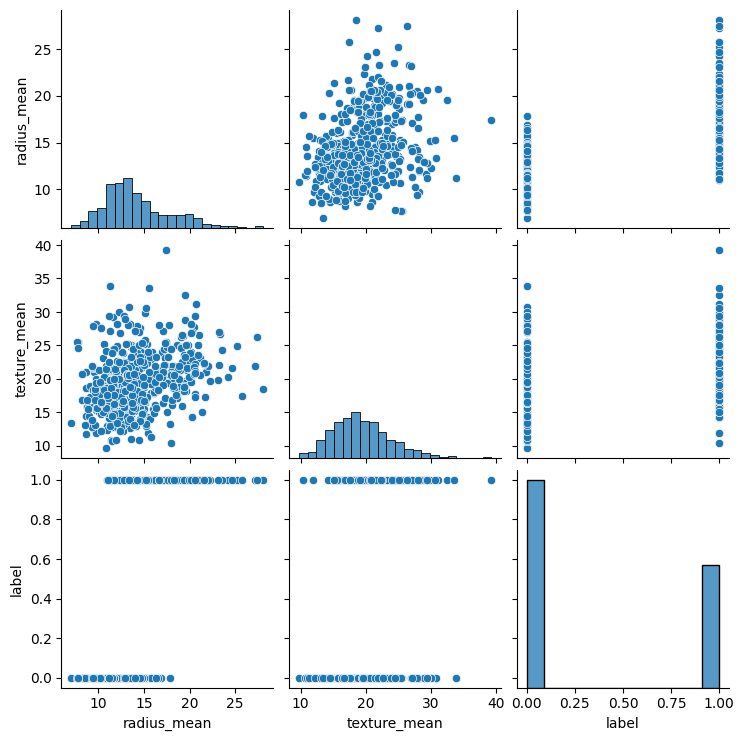

In [38]:
sns.pairplot(data[['radius_mean', 'texture_mean', 'label']])


In [36]:
data.head(1)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0           0.1184   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.2776          0.3001               0.1471         0.2419   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33            184.6      2019.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   

   symmetry_worst  fractal_dimension_worst  label  
0          0.4601                   0.1189      1  

[1 rows x 31 columns]

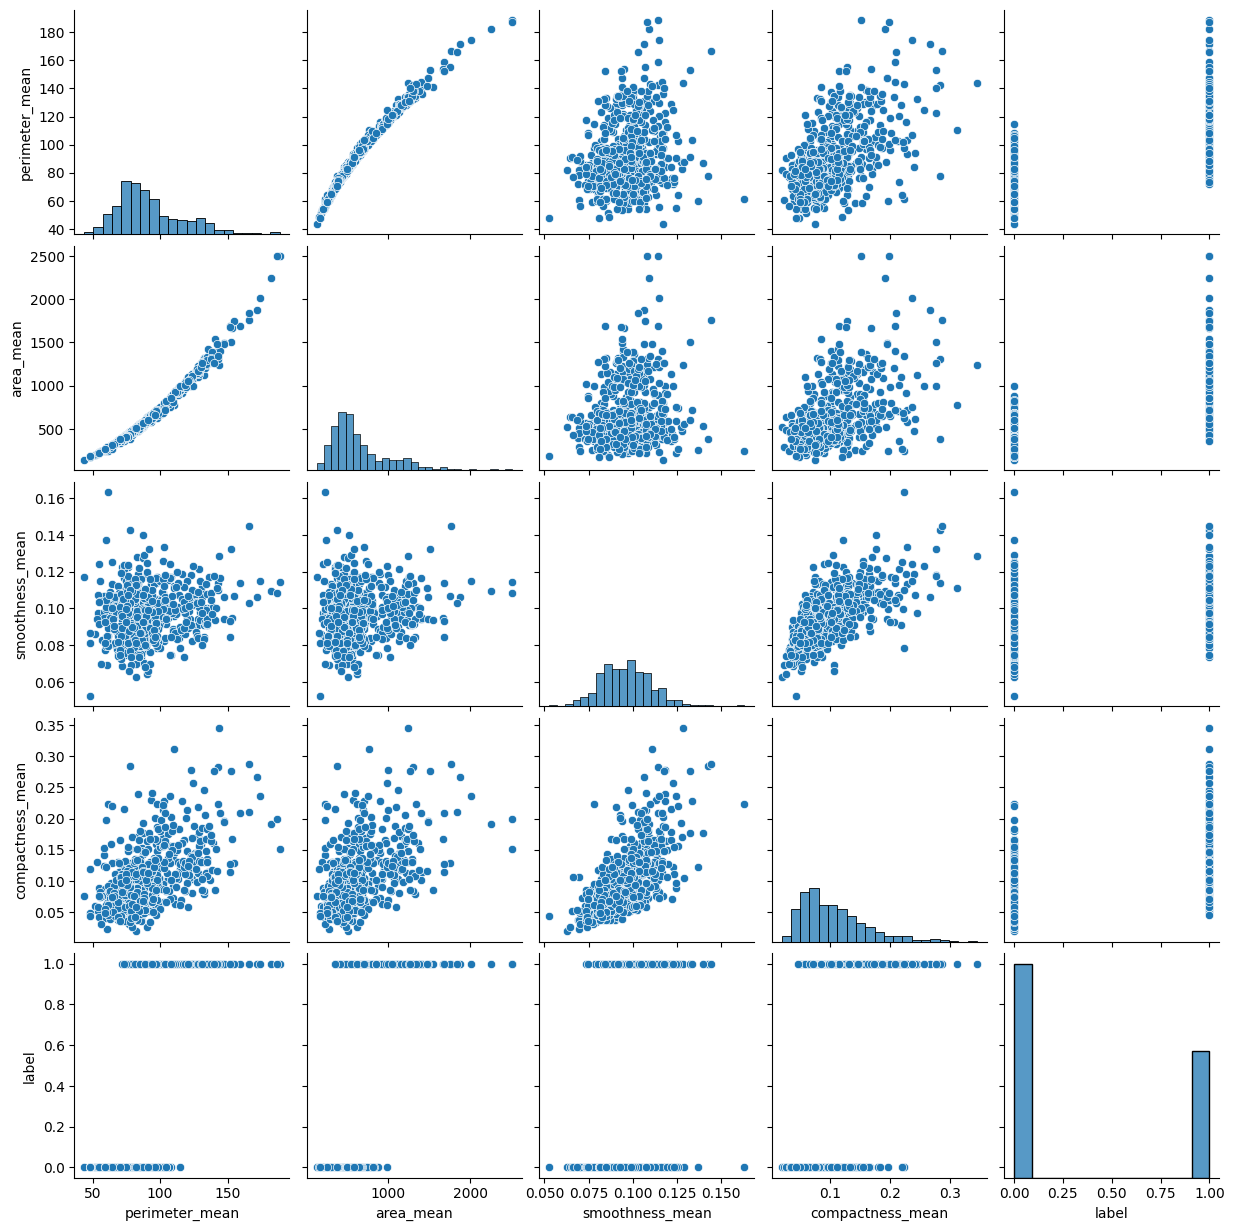

In [39]:
sns.pairplot(data[['perimeter_mean', 'area_mean','smoothness_mean','compactness_mean','label']])


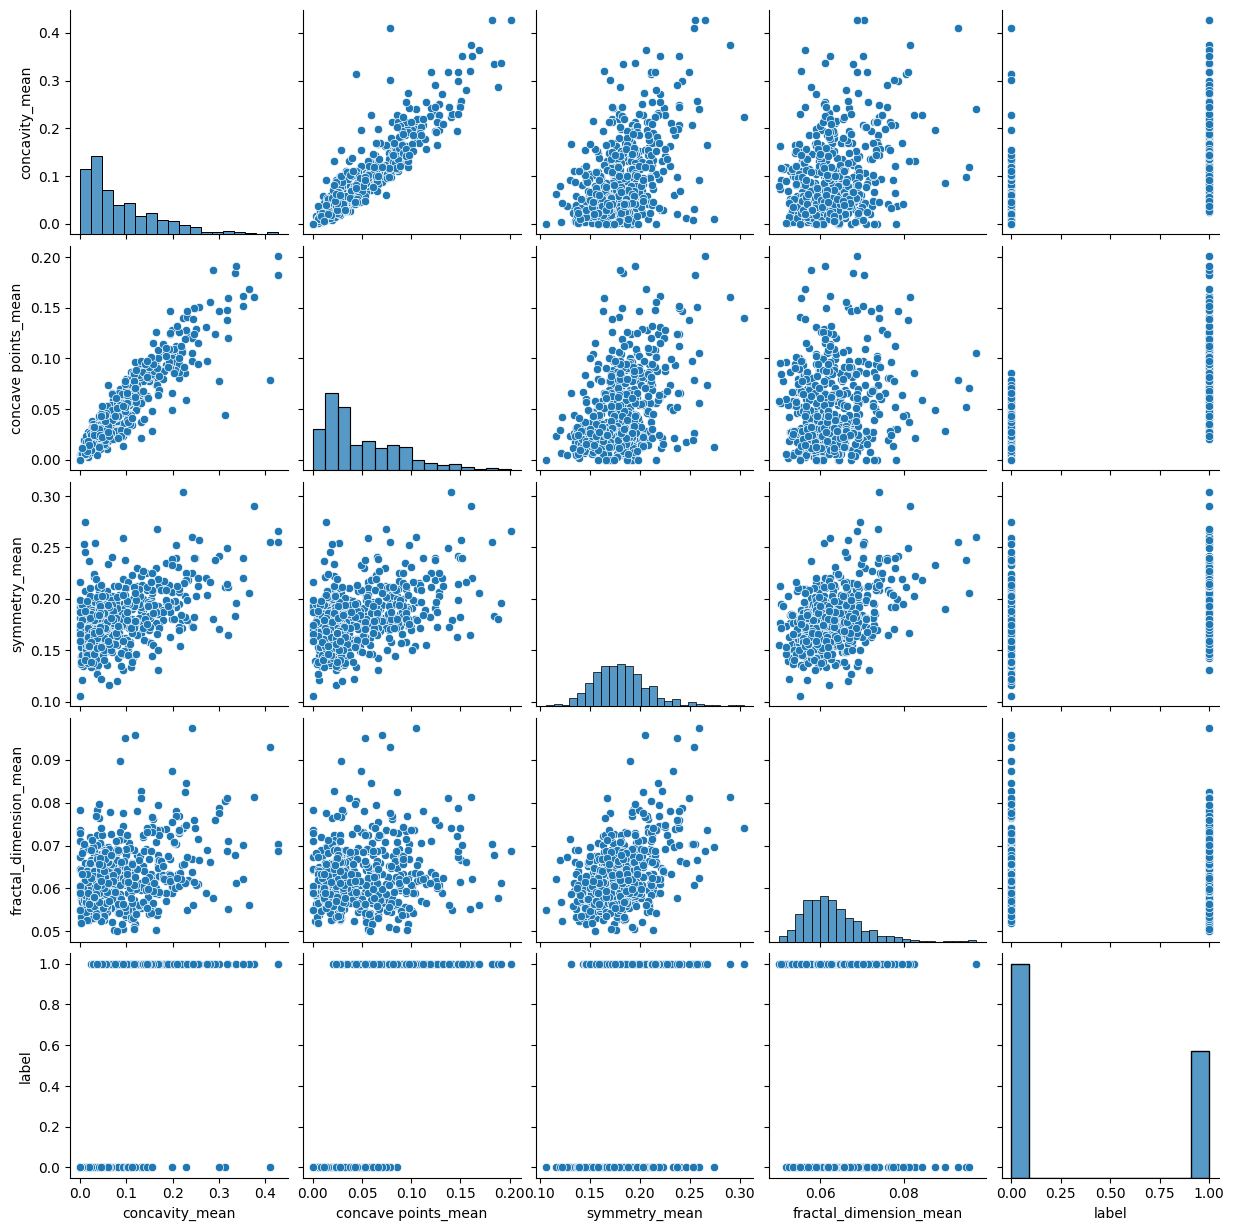

In [40]:
sns.pairplot(data[['concavity_mean', 'concave points_mean','symmetry_mean','fractal_dimension_mean','label']])


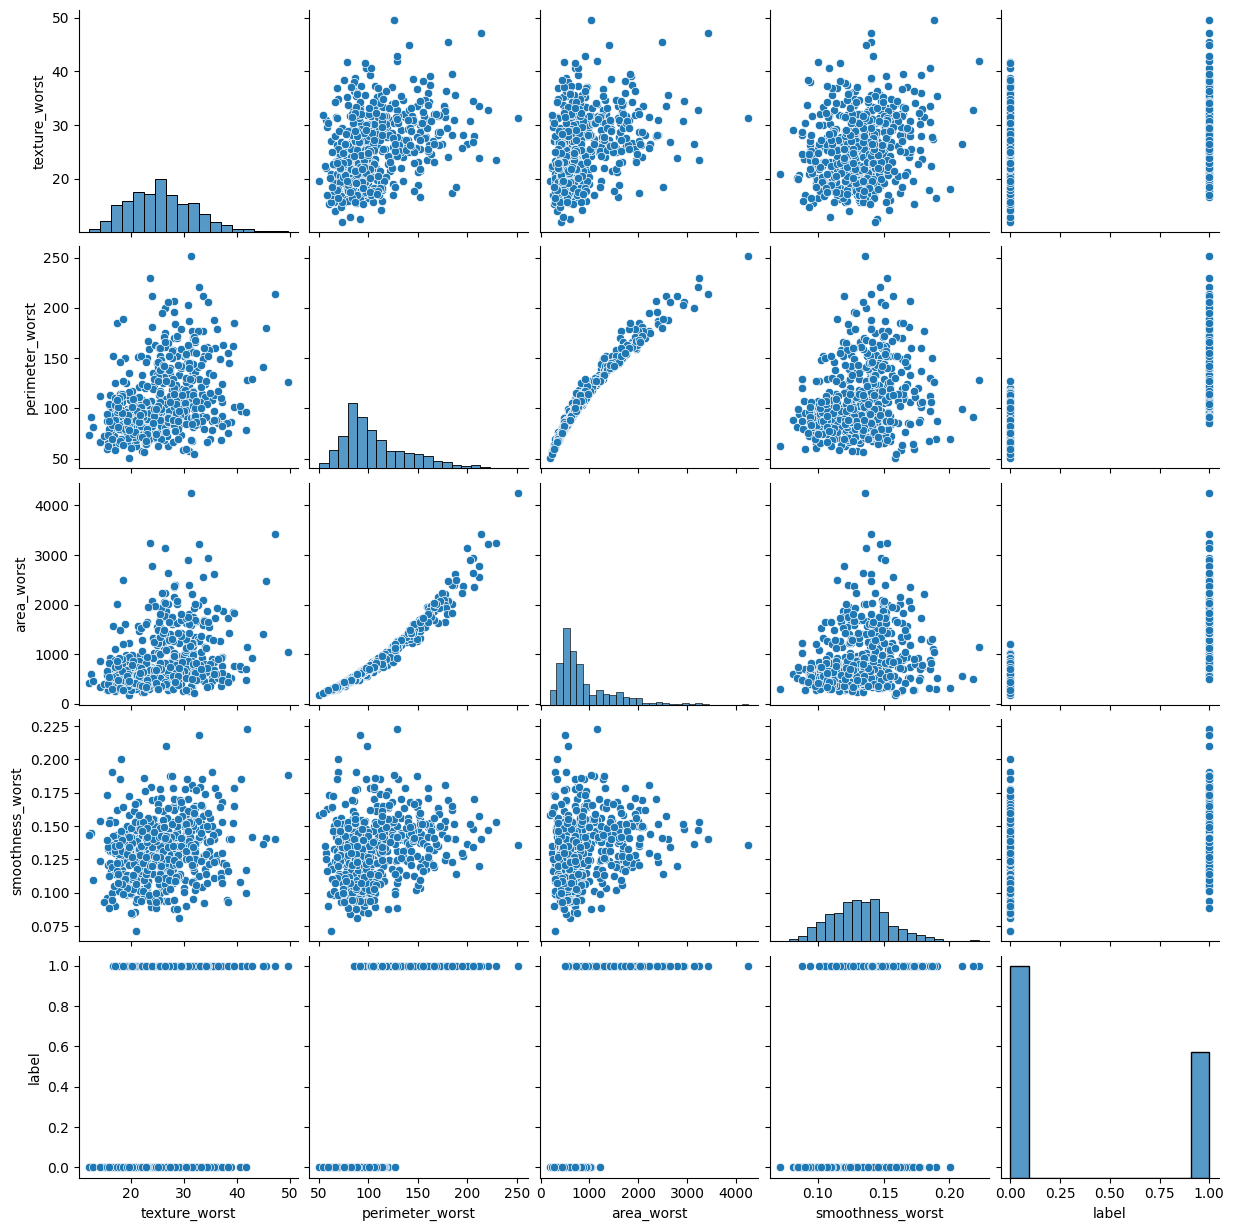

In [41]:
sns.pairplot(data[['texture_worst', 'perimeter_worst','area_worst','smoothness_worst','label']])


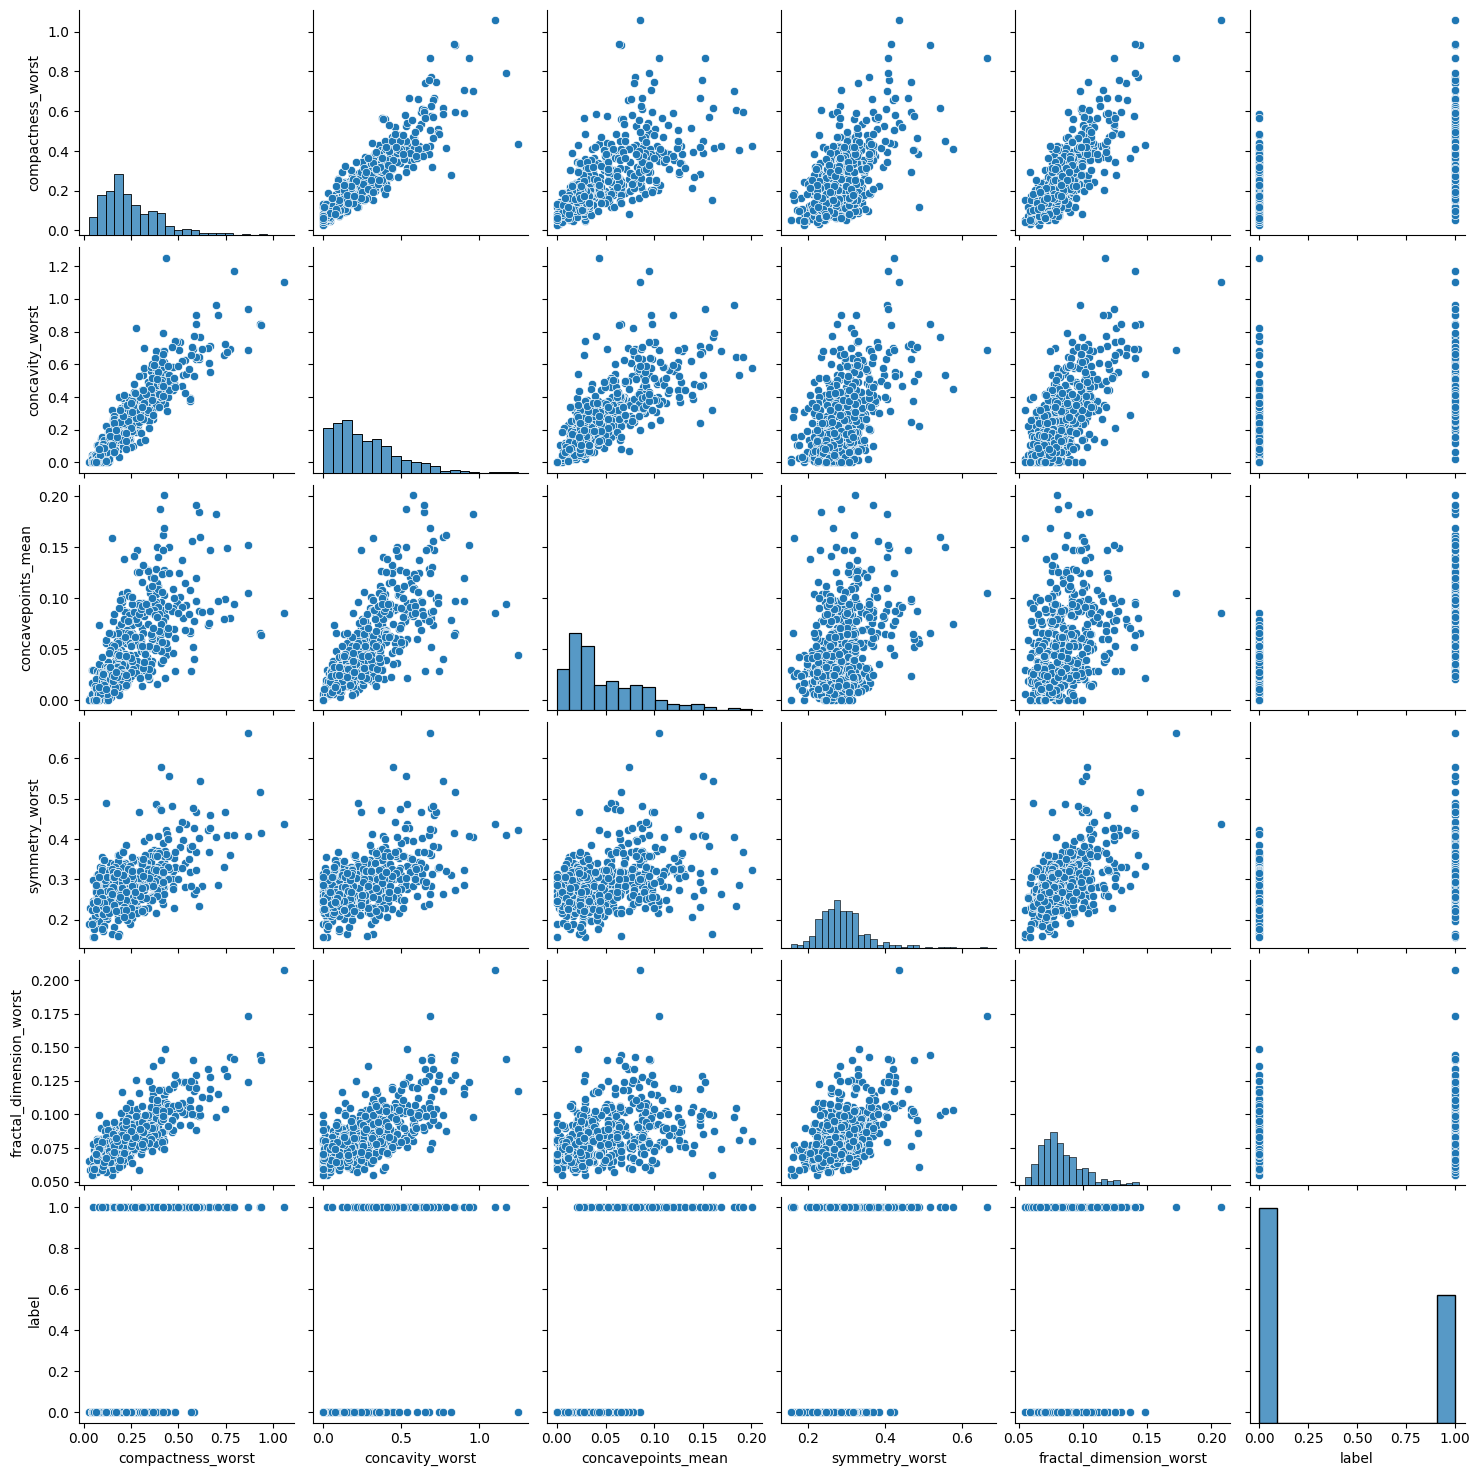

In [46]:
sns.pairplot(data[['compactness_worst', 'concavity_worst','concavepoints_mean','symmetry_worst','fractal_dimension_worst','label']])


In [44]:
data = data.rename(columns={
    'concave points_mean': 'concavepoints_mean'})

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concavepoints_mean       569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

### Model trainning

#### Logestic regration 

In [27]:
# Model training
# Logistic Regression
model = LogisticRegression(max_iter=569)
# Fit the model using the training data
model.fit(x_train, y_train)


C:\Users\binit\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=569)

#### Training the LogisticRegression model using trainning data 

#### model Evaluation

##### Accuracy Score

In [28]:
# accuracy  on tranning data
x_train_predictions = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_predictions)

In [29]:
training_data_accuracy

0.9560439560439561

In [30]:
# accuracy  on test  data
x_test_predictions = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_predictions)

In [31]:
test_data_accuracy

0.9385964912280702

#### Building  a predict System

In [32]:
input_data = (18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
)
#change the input data to numpy array
input_data=np.asarray(input_data)
#reshape the numpy array
input_data=input_data.reshape(1,-1)


In [33]:
# Make a prediction
prediction = model.predict(input_data)

C:\Users\binit\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
prediction

array([1])

In [35]:
# Output the prediction result
if(prediction[0]==0):
    print('Benign')#Benign
else:
    print('Malignant')#Malignant

Malignant
